# Predicting Surgery Outcome: Binary Classification based on Patient Factors and Medical Data

In [1]:
import os
import warnings

import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    r2_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")

In [2]:
path = "../Artifacts/postoperativedata.csv"
df = pd.read_csv(path)
df.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


In [3]:
df.shape

(540, 9)

In [4]:
df.columns

Index(['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL',
       'COMFORT', 'decision ADM-DECS'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   L-CORE             540 non-null    object
 1   L-SURF             540 non-null    object
 2   L-O2               540 non-null    object
 3   L-BP               540 non-null    object
 4   SURF-STBL          540 non-null    object
 5   CORE-STBL          540 non-null    object
 6   BP-STBL            540 non-null    object
 7   COMFORT            540 non-null    int64 
 8   decision ADM-DECS  540 non-null    object
dtypes: int64(1), object(8)
memory usage: 38.1+ KB


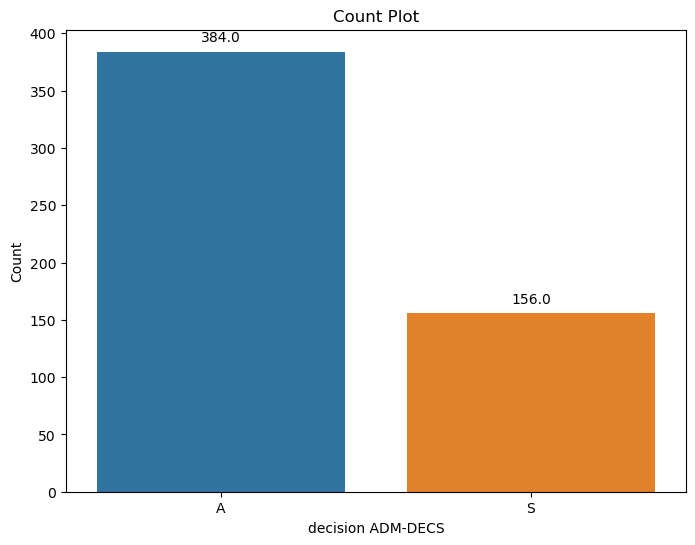

In [6]:
# Create a count plot for the label column
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="decision ADM-DECS")
plt.xlabel("decision ADM-DECS")
plt.ylabel("Count")
plt.title("Count Plot")

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
    )

plt.show()

### checking null values

In [7]:
df.isnull().sum()

L-CORE               0
L-SURF               0
L-O2                 0
L-BP                 0
SURF-STBL            0
CORE-STBL            0
BP-STBL              0
COMFORT              0
decision ADM-DECS    0
dtype: int64

# Splitting the data 

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
# Label encoding
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
X["L-CORE"] = le.fit_transform(X["L-CORE"])
le.classes_

array(['high', 'low', 'mid'], dtype=object)

In [11]:
X["L-SURF"] = le.fit_transform(X["L-SURF"])
le.classes_

array(['high', 'low', 'mid'], dtype=object)

In [12]:
X["L-O2"] = le.fit_transform(X["L-O2"])
le.classes_

array(['excellent', 'good'], dtype=object)

In [13]:
X["L-BP"] = le.fit_transform(X["L-BP"])
le.classes_

array(['high', 'low', 'mid'], dtype=object)

In [14]:
X["SURF-STBL"] = le.fit_transform(X["SURF-STBL"])
le.classes_

array(['stable', 'unstable'], dtype=object)

In [15]:
X["CORE-STBL"] = le.fit_transform(X["CORE-STBL"])
le.classes_

array(['mod-stable', 'stable', 'unstable'], dtype=object)

In [16]:
X["BP-STBL"] = le.fit_transform(X["BP-STBL"])
le.classes_

array(['mod-stable', 'stable', 'unstable'], dtype=object)

### Split the data into training and testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model Building

In [18]:
models = {}
models["Logistic Regression"] = LogisticRegression()
models["Stochastic Gradient Descent"] = SGDClassifier(
    loss="modified_huber", shuffle=True, random_state=101
)
models["Support Vector Machines"] = LinearSVC()
models["Decision Trees"] = DecisionTreeClassifier()
models["Random Forest"] = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    criterion="entropy",
    max_depth=10,
    min_samples_split=3,
)
models["Naive Bayes"] = GaussianNB()
models["K-Nearest Neighbor"] = KNeighborsClassifier()

In [19]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    print("Model:\t{}".format(model))

Model:	LogisticRegression()
Model:	SGDClassifier(loss='modified_huber', random_state=101)
Model:	LinearSVC()
Model:	DecisionTreeClassifier()
Model:	RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       n_estimators=200, random_state=42)
Model:	GaussianNB()
Model:	KNeighborsClassifier()


 # Training the models and calculating the acuuaracy

In [20]:
accuracy, precision, recall = {}, {}, {}
for i in range(len(list(models))):
    model = list(models.values())[i]
    key = list(models.keys())[i]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy[key] = accuracy_score(y_test, predictions)
    precision[key] = precision_score(y_test, predictions)
    recall[key] = recall_score(y_test, predictions)

# Accuaracy of models build 

In [21]:
df_model = pd.DataFrame(
    index=models.keys(), columns=["Accuracy", "Precision", "Recall"]
)
df_model["Accuracy"] = accuracy.values()
df_model["Precision"] = precision.values()
df_model["Recall"] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.675926,0.000000,0.000000
Stochastic Gradient Descent,0.712963,1.000000,0.114286
Support Vector Machines,0.675926,0.000000,0.000000
Decision Trees,0.944444,1.000000,0.828571
Random Forest,0.944444,0.939394,0.885714
Naive Bayes,0.685185,0.545455,0.171429
K-Nearest Neighbor,0.944444,0.939394,0.885714


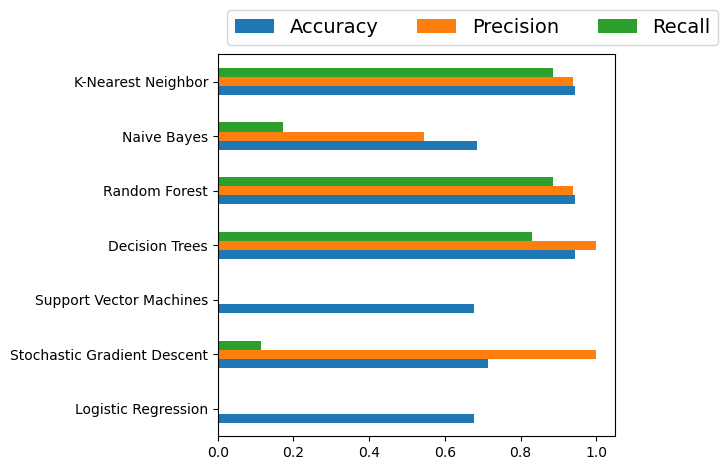

In [25]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), bbox_to_anchor=(0, 1), loc="lower left", prop={"size": 14}
)
plt.tight_layout()

In [26]:
def operation(models):
    lcore = int(input("Enter the L-CORE: "))
    lsurf = int(input("Enter the L-SURF: "))
    l_o2 = int(input("Enter the L-O2: "))
    lbp = int(input("Enter the L-BP: "))
    surf_stbl = int(input("Enter the SURF-STBL: "))
    core_stbl = int(input("Enter the CORE-STBL: "))
    bp_stbl = int(input("Enter the BP-STBL: "))
    comfort = int(input("Enter the COMFORT: "))
    pred_arr = pd.DataFrame(
        np.array(
            [lcore, lsurf, l_o2, lbp, surf_stbl, core_stbl, bp_stbl, comfort]
        ).reshape(1, -1),
        columns=[
            "L-CORE",
            "L-SURF",
            "L-O2",
            "L-BP",
            "SURF-STBL",
            "CORE-STBL",
            "BP-STBL",
            "COMFORT",
        ],
    )
    for i in range(len(list(models))):
        keys = [
            "Logistic Regression",
            "Stochastic Gradient Descent",
            "Support Vector Machines",
            "Decision Trees",
            "Random Forest",
            "Naive Bayes",
            "K-Nearest Neighbor",
        ]
        model = list(models.values())[i]
        pred = model.predict(pred_arr)
        key = keys[i]
        print("\n")
        print(key, end="\n")
        if pred[0] == 0:
            print("Status of operation is: {}".format("Abort"))
        else:
            print("Status of operation is: {}".format("Success"))

In [ ]:
operation(models)